In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json("https://github.com/AmandaFerreira-prog/extrator_licita/raw/main/df.zip")
print(df.shape)
print(df.head(100))
print("\n## Total de municípios: " + str(df["municipio"].unique().size))


(255583, 10)
             municipio       cod  possui_contratos  gastos_totais  \
0      santa-teresinha  B3116BFF             False            0.0   
1           sao-mamede  09E0FB20             False            0.0   
2           sao-mamede  694C3E45             False            0.0   
3           sao-mamede  434F65E4             False            0.0   
4           sao-mamede  216E2832             False            0.0   
..                 ...       ...               ...            ...   
95           boa-vista  3142557C             False            0.0   
96  bonito-de-santa-fe  1BBB7647             False            0.0   
97  bonito-de-santa-fe  3365B764             False            0.0   
98           conceicao  1A1DCD7B             False            0.0   
99           conceicao  5F723113             False            0.0   

    num_contratos objetos_dos_contratos partes_contratadas   ano  mes  dia  
0               0                    []                 []  2018    2   27  
1   

In [2]:
print("\n## Total de atos: " + df["cod"].count().astype(str))

print("\n## Total de Atos por mês\n")
print(df.groupby(["ano", "mes"])["cod"].count())


## Total de atos: 255583

## Total de Atos por mês

ano   mes
2014  1       981
      2      1362
      3      1038
      4      1392
      5      1012
             ... 
2023  8      3698
      9      3309
      10     3406
      11     3348
      12     4288
Name: cod, Length: 120, dtype: int64


In [3]:
print("\n## Média de Atos dos município mês\n")
print(df.groupby(["ano", "mes"])[["cod", "municipio"]].apply(
    lambda x: x.count() / x["municipio"].unique().size)["cod"])


## Média de Atos dos município mês

ano   mes
2014  1      54.500000
      2      68.100000
      3      57.666667
      4      66.285714
      5      48.190476
               ...    
2023  8      40.195652
      9      34.113402
      10     35.479167
      11     33.818182
      12     41.631068
Name: cod, Length: 120, dtype: float64


In [4]:
print("\n## Top 10 Municípios com maior número de atos\n")
print(df.groupby(["municipio"])["cod"].count().sort_values(ascending=False).head(10))


## Top 10 Municípios com maior número de atos

municipio
pombal                27740
picui                 21014
sape                  12966
itaporanga            11321
soledade               9737
conceicao              8140
alhandra               7819
bonito-de-santa-fe     7535
mataraca               7354
boa-vista              7066
Name: cod, dtype: int64


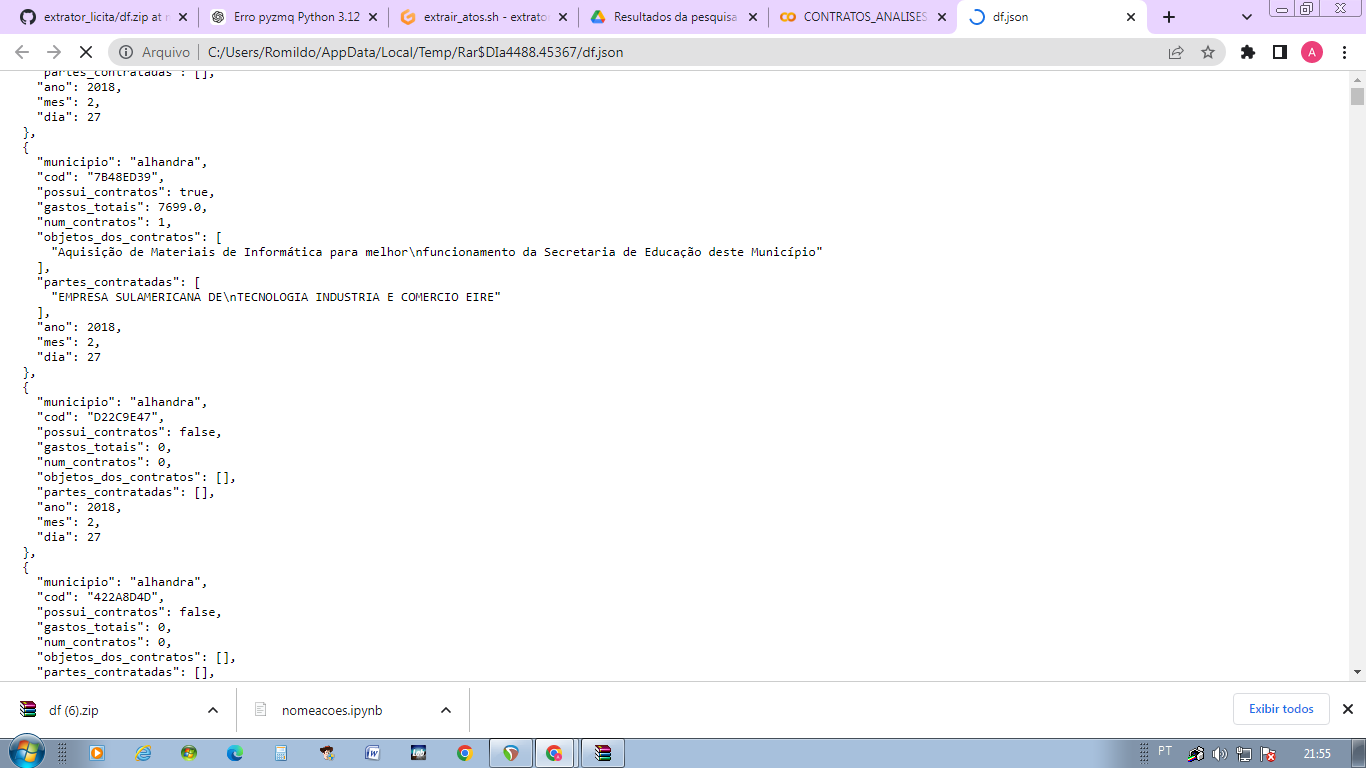

In [5]:
df.columns


Index(['municipio', 'cod', 'possui_contratos', 'gastos_totais',
       'num_contratos', 'objetos_dos_contratos', 'partes_contratadas', 'ano',
       'mes', 'dia'],
      dtype='object')

<ipython-input-6-f856df6d855a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contratos_contagem.index, y=contratos_contagem.values, palette="viridis")


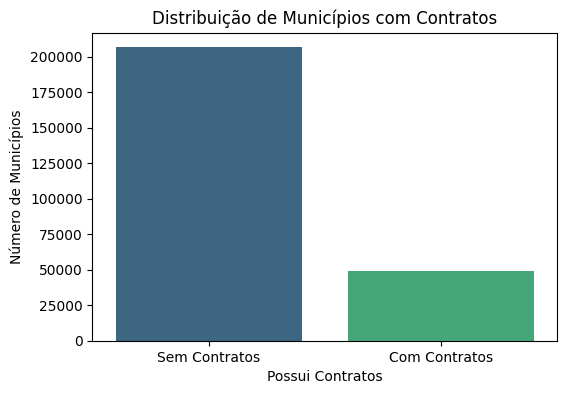

In [6]:
# Contar municípios com e sem contratos
contratos_contagem = df['possui_contratos'].value_counts()

# Plotando os resultados
plt.figure(figsize=(6, 4))
sns.barplot(x=contratos_contagem.index, y=contratos_contagem.values, palette="viridis")
plt.xticks([0, 1], labels=["Sem Contratos", "Com Contratos"])
plt.title("Distribuição de Municípios com Contratos")
plt.xlabel("Possui Contratos")
plt.ylabel("Número de Municípios")
plt.show()


In [7]:
# Calculando média e mediana
media_gastos = df['gastos_totais'].mean()
mediana_gastos = df['gastos_totais'].median()

print(f"Média de Gastos Totais: {media_gastos:.2f}")
print(f"Mediana de Gastos Totais: {mediana_gastos:.2f}")


Média de Gastos Totais: 19974.67
Mediana de Gastos Totais: 0.00


<ipython-input-8-040a786792a6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_gastos.values, y=top10_gastos.index, palette="mako")


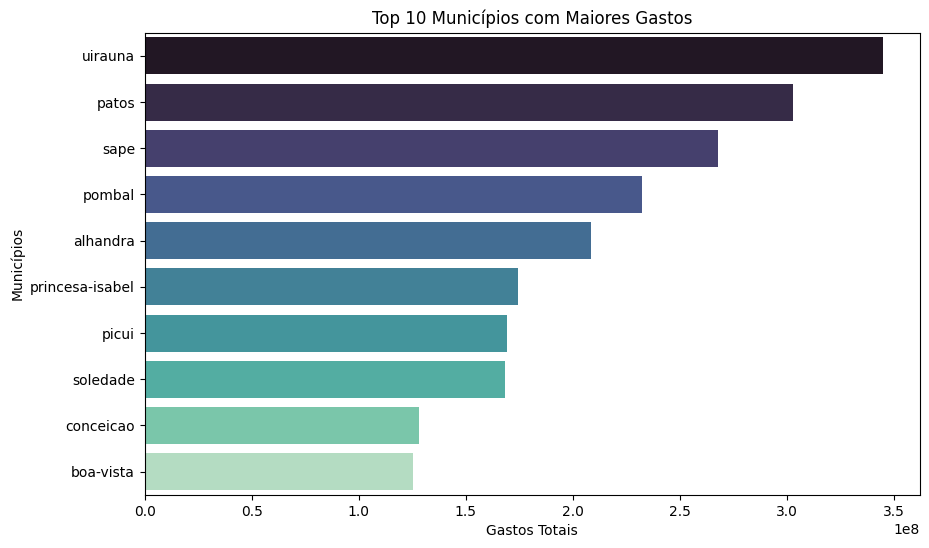

In [8]:
# Agrupando por município e somando gastos
gastos_por_municipio = df.groupby('municipio')['gastos_totais'].sum().sort_values(ascending=False)

# Selecionando os 10 maiores
top10_gastos = gastos_por_municipio.head(10)

# Plotando os resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_gastos.values, y=top10_gastos.index, palette="mako")
plt.title("Top 10 Municípios com Maiores Gastos")
plt.xlabel("Gastos Totais")
plt.ylabel("Municípios")
plt.show()


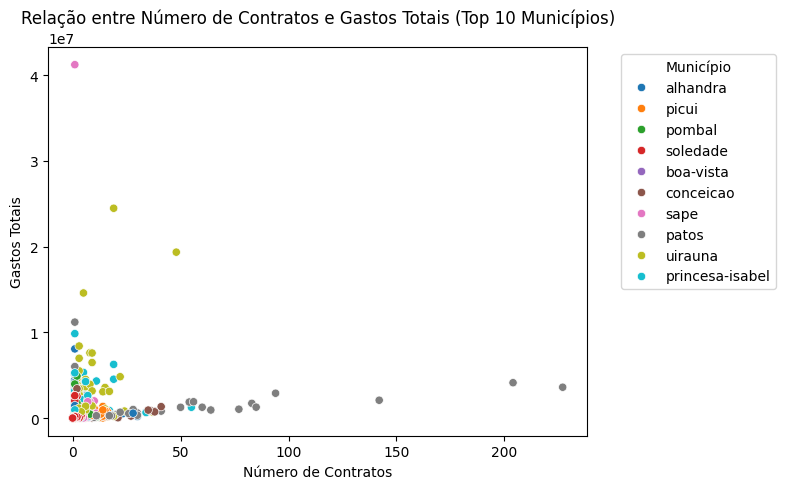

In [9]:
# Selecionar os Top 10 municípios com maior gasto total
top_municipios = df.groupby('municipio')['gastos_totais'].sum().nlargest(10).index

# Filtrar o DataFrame
df_top = df[df['municipio'].isin(top_municipios)]

# Scatter plot para relação
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_top, x='num_contratos', y='gastos_totais', hue='municipio', palette="tab10")
plt.title("Relação entre Número de Contratos e Gastos Totais (Top 10 Municípios)")
plt.xlabel("Número de Contratos")
plt.ylabel("Gastos Totais")
plt.legend(title="Município", bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajusta a legenda
plt.tight_layout()
plt.show()



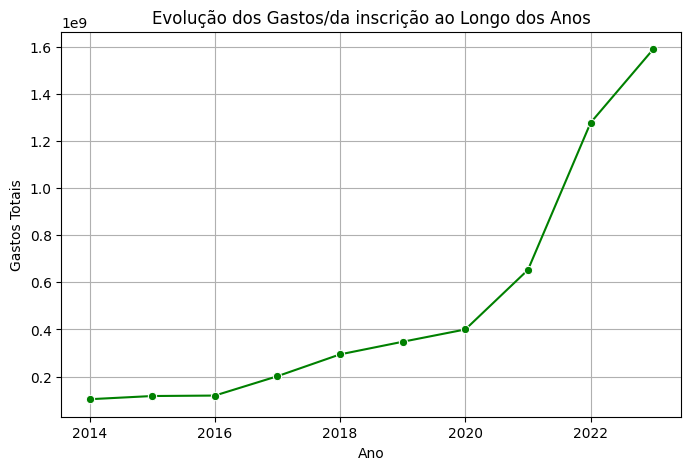

In [10]:
# Somando os gastos por ano
gastos_por_ano = df.groupby('ano')['gastos_totais'].sum()

# Plotando os resultados
plt.figure(figsize=(8, 5))
sns.lineplot(x=gastos_por_ano.index, y=gastos_por_ano.values, marker='o', color="green")
plt.title("Evolução dos Gastos/da inscrição ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Gastos Totais")
plt.grid(True)
plt.show()


<ipython-input-11-e575bffd09b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='municipio', y='gastos_totais', palette="coolwarm")


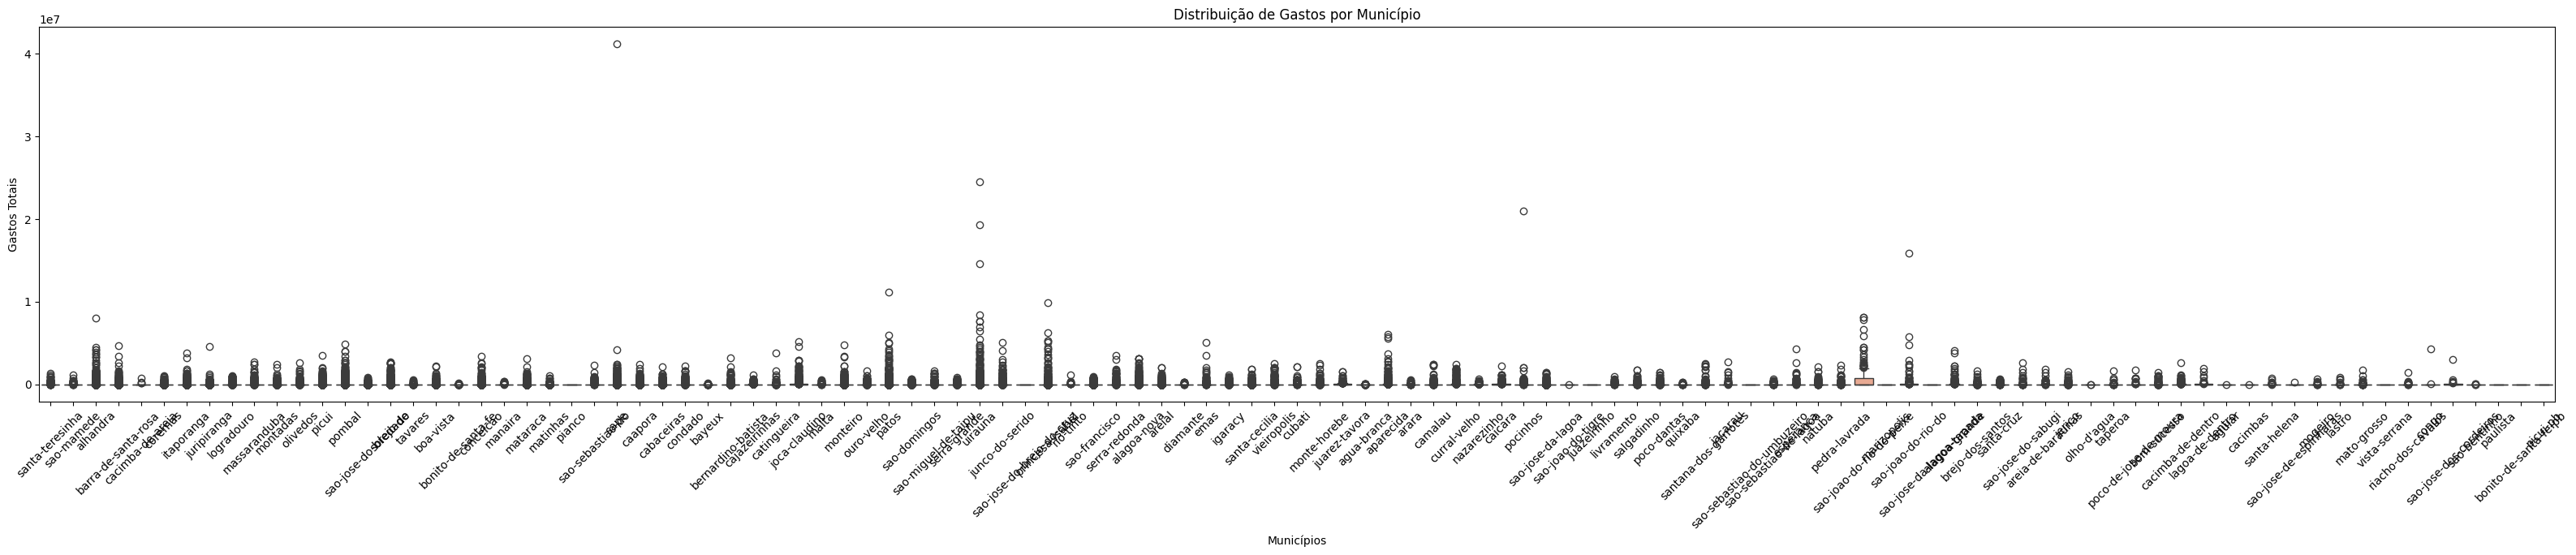

In [11]:
# Plotando a distribuição dos gastos
plt.figure(figsize=(40, 6))
sns.boxplot(data=df, x='municipio', y='gastos_totais', palette="coolwarm")
plt.title("Distribuição de Gastos por Município")
plt.xlabel("Municípios")
plt.ylabel("Gastos Totais")
plt.xticks(rotation=45)
plt.show()


<ipython-input-12-dc515e210b21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contratos_por_mes.index, y=contratos_por_mes.values, palette="pastel")


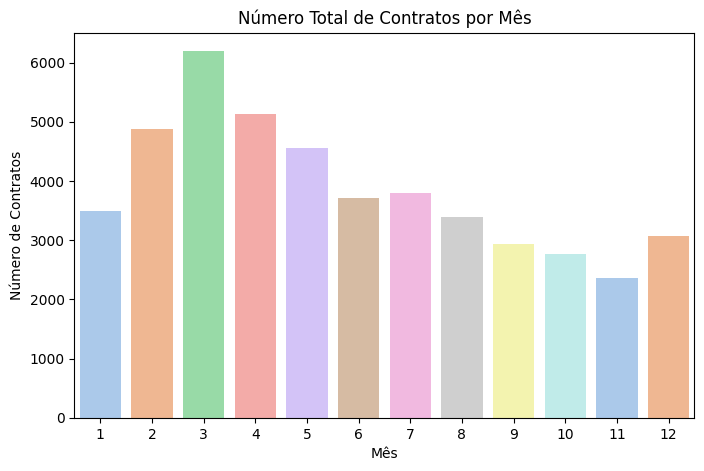

In [12]:
# Somando contratos por mês
contratos_por_mes = df.groupby('mes')['num_contratos'].sum()

# Plotando o total de contratos por mês
plt.figure(figsize=(8, 5))
sns.barplot(x=contratos_por_mes.index, y=contratos_por_mes.values, palette="pastel")
plt.title("Número Total de Contratos por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Contratos")
plt.show()


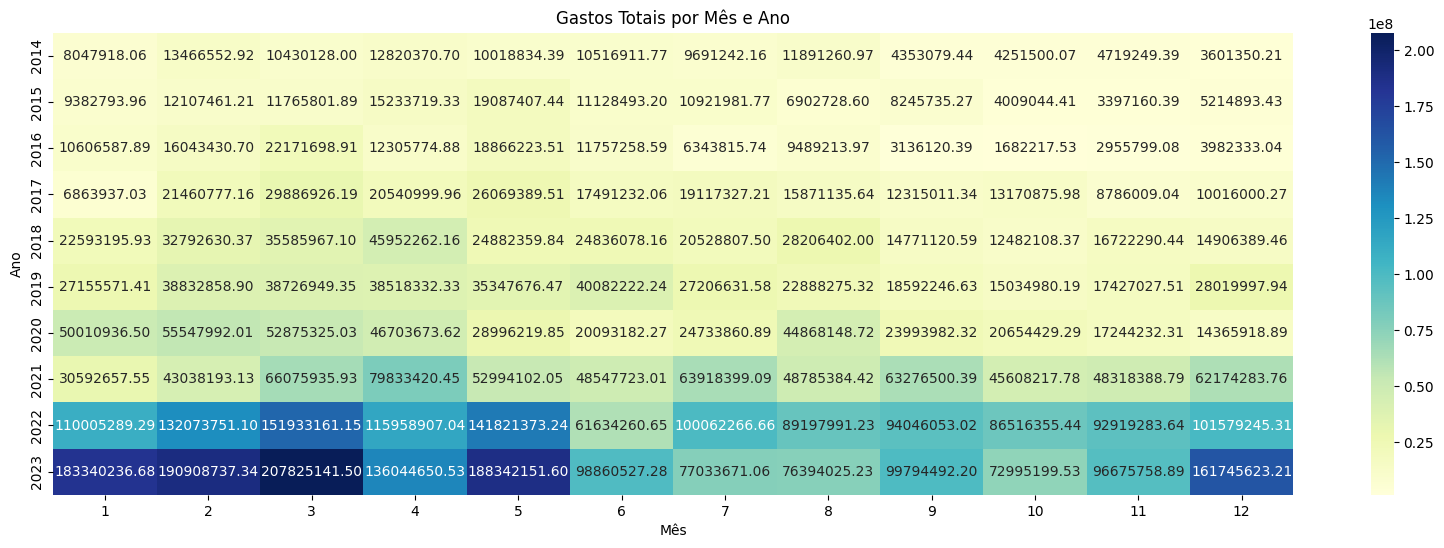

In [14]:
# Criando uma tabela pivot
gastos_mes_ano = df.pivot_table(values='gastos_totais', index='ano', columns='mes', aggfunc='sum', fill_value=0)

# Plotando os gastos totais por mês e ano
plt.figure(figsize=(20, 6))
sns.heatmap(gastos_mes_ano, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Gastos Totais por Mês e Ano")
plt.xlabel("Mês")
plt.ylabel("Ano")
plt.show()


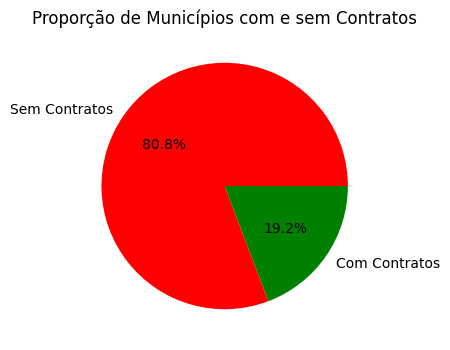

In [16]:
# Calculando a proporção
contratos_proporcao = df['possui_contratos'].value_counts(normalize=True)

# Plotando a proporção
plt.figure(figsize=(6, 4))
contratos_proporcao.plot(kind='pie', labels=["Sem Contratos", "Com Contratos"], autopct='%1.1f%%', colors=["red", "green"])
plt.title("Proporção de Municípios com e sem Contratos")
plt.ylabel("")
plt.show()


<ipython-input-17-f65628c8852a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contratos_por_ano.index, y=contratos_por_ano.values, palette="viridis")


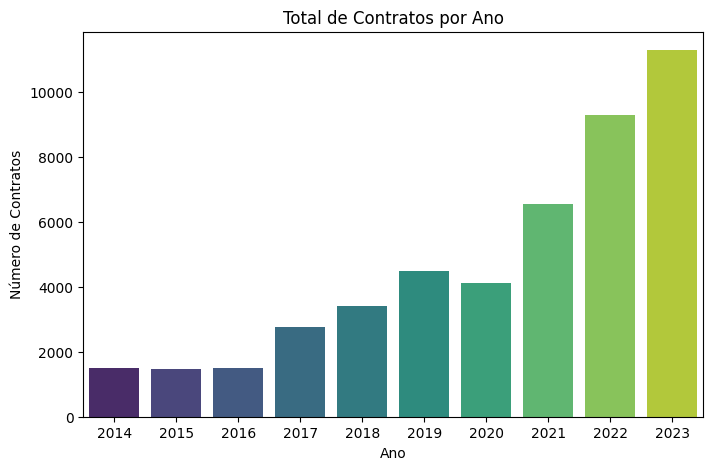

In [17]:
# Somando o número de contratos por ano
contratos_por_ano = df.groupby('ano')['num_contratos'].sum()

# Plotando os resultados
plt.figure(figsize=(8, 5))
sns.barplot(x=contratos_por_ano.index, y=contratos_por_ano.values, palette="viridis")
plt.title("Total de Contratos por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Contratos")
plt.show()
